<a href="https://colab.research.google.com/github/divyansh-ag-03/IAIML/blob/main/IAIML_Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What can we learn about different hosts and areas?<br>
What can we learn from predictions? (ex: locations, prices, reviews, etc)<br>
Which hosts are the busiest and why?<br>
Is there any noticeable difference of traffic among different areas and what could be the reason for it?<br>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset into Dataframe

In [2]:
url = 'https://raw.githubusercontent.com/divyansh-ag-03/IAIML/main/Datasets/AB_NYC_2019.csv'
df = pd.read_csv(url)

dfQ = df.copy()

#Exploratory Data Analysis


In [3]:
df.head()
df.shape

(48895, 16)

Checking number of rows and columns in the dataset and checking if the dataframe was loaded properly or not.

In [4]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Getting to know unique neighbourhood locations where AirBnb's are available across NYC.

In [5]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

To know kind of rooms in the available AirBnb's. So that we can find there average price of stay if required.

In [6]:
df.info()

#Gives us all columns available in the dataset with number of non-null rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df['room_type'].value_counts()

#Gives number of units for each type of available room.

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#Handling Missing Values

In [9]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

Since we found that there are many null values in the reviews per month column, thus we can just find mean of given reviews per hotel and enter the mean value to remove any missing values.

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


We can see that the null values in the reviews per month column are filled with mean value of column.

In [11]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.253252,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.255046,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.009115,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.091942,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.530093,-0.072376,0.172028
reviews_per_month,0.253252,0.255046,-0.009115,0.131599,-0.022373,-0.091942,0.530093,1.000000,-0.006701,0.162980
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.006701,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.162980,0.225701,1.000000


The formula used behind `df.corr()` is the Pearson correlation coefficient formula. For two variables X and Y, the Pearson correlation coefficient (often denoted as \(r\)) is calculated as:

r = Σ((X - X̄)(Y - Ȳ)) / (√(Σ(X - X̄)² * Σ(Y - Ȳ)²))

Where:

r is the correlation coefficient.

X and Y are the variables being correlated.

X̄ and Ȳ are the means (averages) of X and Y, respectively.

The Pearson correlation coefficient measures the linear relationship between two variables. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

Finding the correlation in the dataset helps identify relationships between variables. In the context of the Airbnb dataset, it can reveal how features like price, location, and reviews are related, enabling insights into factors affecting listing popularity, pricing strategies, and customer preferences for better decision-making and analysis.

<ipython-input-13-213dd5abb70a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

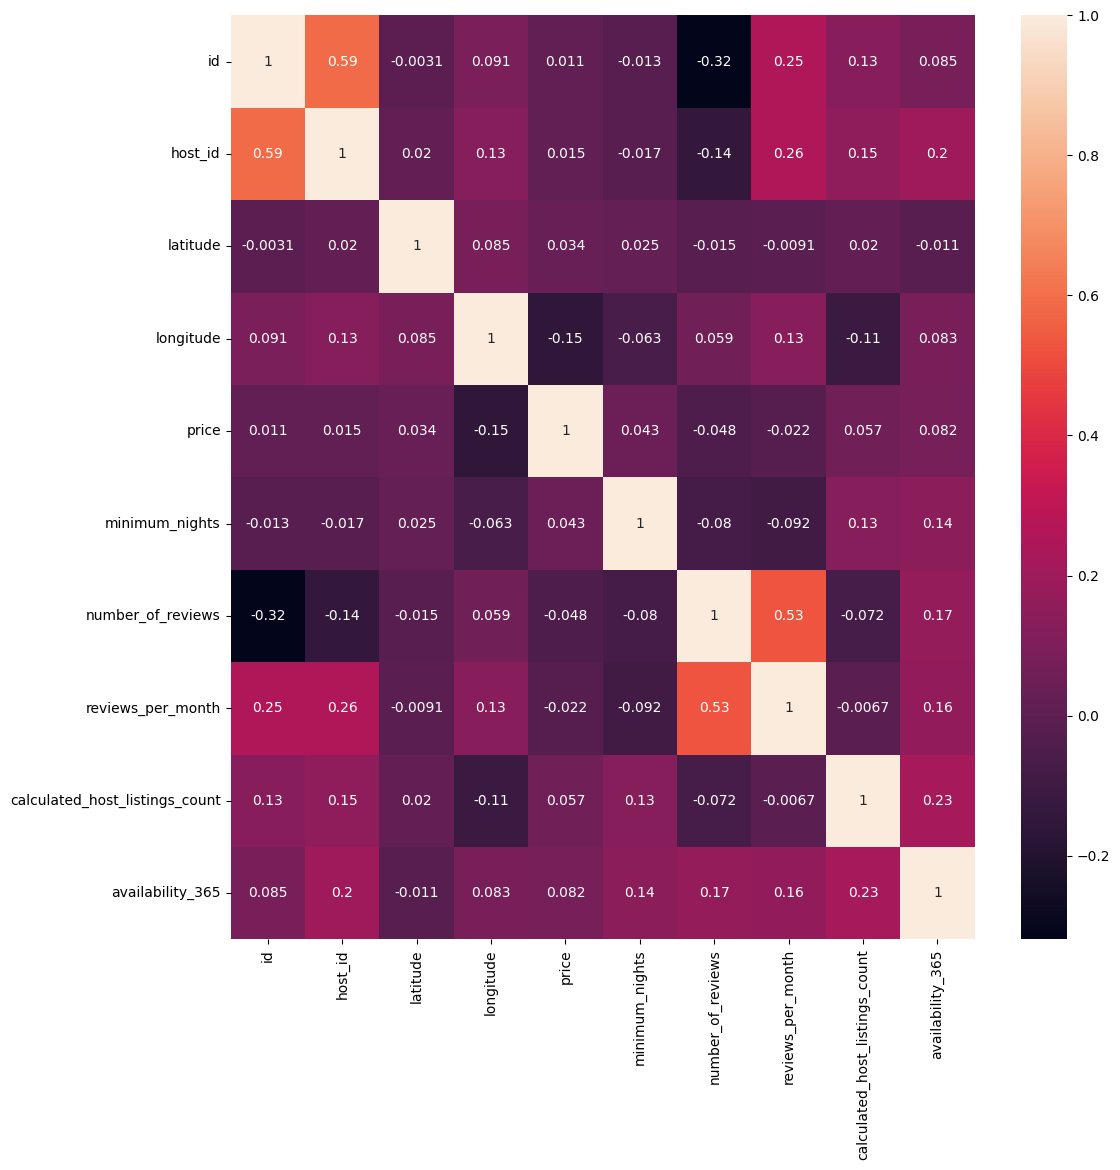

In [13]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

Using the heatmap, we can look the correlation of all integer type columns graphically to get a quicker look of more or less correlated attributes.

In [14]:
correlation_matrix = df.corr()

#Upper triangle of the correlation matrix into a 1D array
correlation_values = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool)).stack()

#Correlation values in ascending order
sorted_correlation_values = correlation_values.sort_values(ascending=True)

#Correlation values in ascending order
print(sorted_correlation_values)

id                              number_of_reviews                -0.319760
longitude                       price                            -0.150019
host_id                         number_of_reviews                -0.140106
longitude                       calculated_host_listings_count   -0.114713
minimum_nights                  reviews_per_month                -0.091942
                                number_of_reviews                -0.080116
number_of_reviews               calculated_host_listings_count   -0.072376
longitude                       minimum_nights                   -0.062747
price                           number_of_reviews                -0.047954
                                reviews_per_month                -0.022373
host_id                         minimum_nights                   -0.017364
latitude                        number_of_reviews                -0.015389
id                              minimum_nights                   -0.013224
latitude                 

<ipython-input-14-ebfba35c36ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
<ipython-input-14-ebfba35c36ee>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correlation_values = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool)).stack()


The .where() function is used to filter elements in the correlation matrix where a specific condition is met. np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool) creates a boolean representing the upper triangle of the matrix. By stacking this masked matrix, we obtain a 1D array containing only the upper triangle values. Sorting these values in ascending order with sort_values() help us get a sorted list of least to most correlated columns.






In [15]:
df.drop(['host_id'], axis=1, inplace=True)

df.drop(['last_review'], axis=1, inplace=True)

These columns were found to be of no use in answering the questions we want to know so we can just remove them to clean and reduce data to be more precise to our outcomes.

In [16]:
df.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [17]:
df.shape

(48895, 14)

#Scaling and Normalization

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['price', 'minimum_nights']] = scaler.fit_transform(df[['price', 'minimum_nights']])

We are standardizing the values for comparing the price and minimum nights column as, standardizing 'price' and 'minimum_nights' enhances comparability, aids modeling and interpretation, and improves visualization, thereby facilitating deeper insights from the dataset.

The formula behind scaling in the given code is based on the Z-score formula for standardization:

Z= (X-μ)/σ

Z is the standardized value.

X is the original value.

μ is the mean value of the column.

σ is the standard deviation of the column.

This process scales the data to have a mean of 0 and a standard deviation of 1, resulting in the standardized values.

In [19]:
df

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,-0.015493,-0.293996,9,0.210000,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.300974,-0.293996,45,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,-0.011329,-0.196484,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,-0.265335,-0.293996,270,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,-0.302811,0.144807,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,-0.344452,-0.245240,0,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,-0.469373,-0.147729,0,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,-0.157070,0.144807,0,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,-0.406912,-0.293996,0,1.373221,6,2


#Feature Engineering/Encoding

In [20]:
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'])

The get_dummies method in Pandas provides a convenient way to perform One-Hot Encoding on data.

One-hot encoding is a way to represent categorical data (like neighborhood names or room types) as binary numbers (0s and 1s). It creates a new column for each category and puts a 1 in the column that matches the category of the data point and 0s in all the other columns.

Suppose we have a column 'Category' with categories {A, B, C}. The one-hot encoding formula for a data point is:

- 'Category_A' = 1 if 'Category' is 'A', else 0
- 'Category_B' = 1 if 'Category' is 'B', else 0
- 'Category_C' = 1 if 'Category' is 'C', else 0

This way, we represent categories as binary values to use them in machine learning models.


In [21]:
df_encoded

,id,name,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,John,Kensington,40.64749,-73.97237,-0.015493,-0.293996,9,0.210000,6,365,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,Jennifer,Midtown,40.75362,-73.98377,0.300974,-0.293996,45,0.380000,2,355,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Harlem,40.80902,-73.94190,-0.011329,-0.196484,0,1.373221,1,365,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Clinton Hill,40.68514,-73.95976,-0.265335,-0.293996,270,4.640000,1,194,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,East Harlem,40.79851,-73.94399,-0.302811,0.144807,9,0.100000,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,-0.344452,-0.245240,0,1.373221,2,9,0,1,0,0,0,0,1,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,Marisol,Bushwick,40.70184,-73.93317,-0.469373,-0.147729,0,1.373221,2,36,0,1,0,0,0,0,1,0
48892,36485431,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Harlem,40.81475,-73.94867,-0.157070,0.144807,0,1.373221,1,27,0,0,1,0,0,1,0,0
48893,36485609,43rd St. Time Square-cozy single bed,Taz,Hell's Kitchen,40.75751,-73.99112,-0.406912,-0.293996,0,1.373221,6,2,0,0,1,0,0,0,0,1


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'neighbourhood_group' column
df['neighbourhood_group_encoded'] = label_encoder.fit_transform(df['neighbourhood_group'])

# Print the updated DataFrame
print(df[['neighbourhood_group', 'neighbourhood_group_encoded']])

      neighbourhood_group  neighbourhood_group_encoded
0                Brooklyn                            1
1               Manhattan                            2
2               Manhattan                            2
3                Brooklyn                            1
4               Manhattan                            2
...                   ...                          ...
48890            Brooklyn                            1
48891            Brooklyn                            1
48892           Manhattan                            2
48893           Manhattan                            2
48894           Manhattan                            2

[48895 rows x 2 columns]


We use Label Encoding to convert the 'neighbourhood_group' column from categorical values to numerical values. It assigns a unique number to each category in the column, creating a new column called 'neighbourhood_group_encoded' with numerical values.

This allows the categorical data to be used in machine learning algorithms that require numerical input.

Label Encoding converts categorical data into numerical labels.
1. We initialize the LabelEncoder.

2. We use .fit_transform() to fit the encoder to the categorical column and transform the column into numerical labels.

3. The 'neighbourhood_group' column, for example, gets transformed into 'neighbourhood_group_encoded' with unique numerical labels for each category.

For example:

- 'Manhattan' becomes '0'
- 'Brooklyn' becomes '1'
- 'Queens' becomes '2'

This transformation allows you to use these numerical labels in machine learning models that require numerical input.

In [23]:
df.neighbourhood_group_encoded.unique()

array([1, 2, 3, 4, 0])

In [24]:
neighborhood_counts = df.groupby('neighbourhood_group_encoded')['host_name'].count()

In [25]:
neighborhood_counts

neighbourhood_group_encoded
0     1090
1    20095
2    21652
3     5664
4      373
Name: host_name, dtype: int64

#Answering the questions/concluding insights.

#Q1 What can we learn about different hosts and areas?

In [26]:
import pandas as pd

dfQ.dropna(subset=['host_name'], inplace=True)

# Host diversity.
unique_hosts = dfQ['host_id'].nunique()
average_price_per_host = dfQ.groupby('host_id')['price'].mean()

# Area analysis
area_counts = dfQ['neighbourhood_group'].value_counts()

print("Number of unique hosts are:", unique_hosts)
print("Average price per host is:")
print(average_price_per_host.head())
print("Listing counts per area:")
print(area_counts)


Number of unique hosts are: 37439
Average price per host is:
host_id
2438     95.000000
2571    182.000000
2787    100.666667
2845    162.000000
2868     60.000000
Name: price, dtype: float64
Listing counts per area:
Manhattan        21652
Brooklyn         20095
Queens            5664
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64


#Q2 Which hosts are the busiest?

In [27]:
import pandas as pd

# Analyzing busy hosts
busy_hosts = dfQ.sort_values(by='number_of_reviews', ascending=False).head(10)

# The busiest hosts
print("Top 10 busiest hosts:")
print(busy_hosts[['host_name', 'number_of_reviews']])


Top 10 busiest hosts:
      host_name  number_of_reviews
11759      Dona                629
2031         Jj                607
2030         Jj                597
2015         Jj                594
13495      Dona                576
10623      Maya                543
1879      Carol                540
20403  Danielle                510
4870        Asa                488
471       Wanda                480


The busiest hosts are those with the highest number of reviews. This could be due to several reasons:

High-quality listings that attract more guests.

Competitive pricing strategies.

Prime location in desirable neighborhoods.

Positive guest experiences leading to more reviews.

Analyzing busy hosts can provide insights into successful hosting practices and strategies.

#Q3 Is there any noticeable difference in traffic among different areas, and what could be the reason for it?

In [28]:
import pandas as pd

# Traffic analysis by area
area_traffic = dfQ.groupby('neighbourhood_group')['number_of_reviews'].mean()

print("Average number of reviews by area:")
print(area_traffic)


Average number of reviews by area:
neighbourhood_group
Bronx            25.994495
Brooklyn         24.194178
Manhattan        20.975476
Queens           27.701624
Staten Island    30.941019
Name: number_of_reviews, dtype: float64


Yes, there is a noticeable difference in traffic (number of reviews) among different areas. Some neighborhoods may receive more reviews due to factors like:

Tourist attractions or landmarks.

Proximity to transportation hubs.

A wide variety of available listings.

Safety and reputation.

Cultural or entertainment events.

Price competitiveness.

Understanding these variations can help hosts and policymakers tailor their strategies and services to meet the specific demands of each neighborhood.